In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#img_array = cv2.imread('Dataset/Face_Mask/00000_Mask.jpg')

In [3]:
#plt.imshow(img_array) ## BGR IMAGE

In [4]:
#plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [5]:
#img_array.shape

Face_Mask


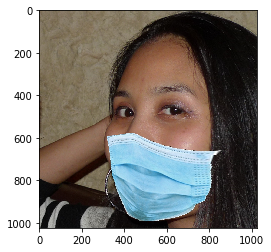

In [2]:
datadirectory = 'Dataset/' # training dataset
classes=['Face_Mask','No_Mask'] # list of classes
for category in classes:
    print(category)
    path = os.path.join(datadirectory,category) ## to access the training data
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [3]:
img_array.shape

(1024, 1024, 3)

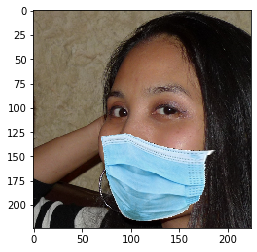

In [4]:
img_size = 224 # for imagenet classifier we need images of 224 * 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Reading all the images and converting them into arrays

In [5]:
training_data = [] ## data
def create_training_data():
    for category in classes:
        path = os.path.join(datadirectory,category)
        class_num = classes.index(category) ## 0 , 1 from classes list , these are labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
create_training_data()

In [7]:
print(len(training_data))

1950


In [8]:
import random
random.shuffle(training_data)

In [9]:
X = [] ## data features
y = [] ## label

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [10]:
X.shape

(1950, 224, 224, 3)

In [11]:
X = X/255.0; ## to normalize it , max level of grey level is 255 so using 255 value

In [12]:
Y = np.array(y)

In [14]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()


In [18]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

# Deep learning model for traning the data - Transfer learning

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.mobilenet.MobileNet() ## pretrained model

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [22]:
# transfering learning - it a technique , use the existing solution, change the last layers of the model - softmax and layers after dropout we need to modify

# Transfer Learning - Tuning, weights will start from lst checkpoint

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-4].output

In [53]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## 0 , 1
final_output = layers.Activation('sigmoid')(final_output)

In [54]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [55]:
new_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

# Setting the binary classification(Face Mask / Without Mask)

In [56]:
new_model.compile(loss="binary_crossentropy",optimizer ='adam',metrics=['accuracy'])

In [57]:
Y.shape

(1950,)

In [59]:
new_model.fit(X,Y,epochs = 1,validation_split = 0.1)

55/55 [==============================] - 156s 3s/step - loss: 0.0033 - accuracy: 0.9977 - val_loss: 5.8071e-04 - val_accuracy: 1.0000


In [61]:
Y.shape

(1950,)

In [62]:
new_model.save('my_model3.h5')

In [63]:
new_model = tf.keras.models.load_model('my_model3.h5')

In [64]:
#for layers in model.layer:
 #   layer.trainable = false

# Checking the network for prediction 

In [95]:
frame = cv2.imread('Dataset/Face_Mask/00023_Mask.jpg')

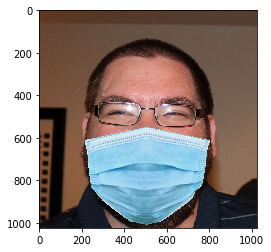

In [96]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [97]:
final_image = cv2.resize(frame,(224,224))

In [98]:
final_image = np.expand_dims(final_image,axis =0) ## need four dimensions
final_image=final_image/255.0

In [99]:
predictions = new_model.predict(final_image)

In [100]:
predictions

array([[1.0189028e-15]], dtype=float32)

In [101]:
frame = cv2.imread('Dataset/Face_Mask/00023_Mask.jpg') 

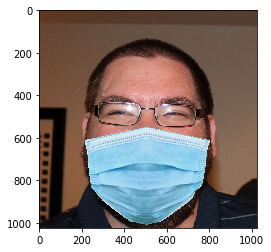

In [102]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [103]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [104]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [105]:
gray.shape

(1024, 1024)

In [106]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w , y+h),(255,0,0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print('face not detected')
    else:
        for(ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

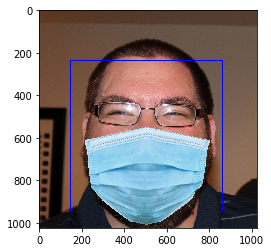

In [107]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

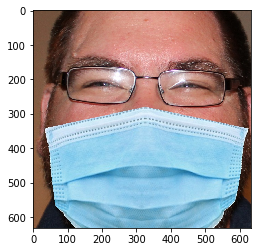

In [108]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [109]:
final_image =cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis =0) ## need four dimensions
final_image=final_image/255.0

In [110]:
predictions = new_model.predict(final_image)

In [112]:
int(predictions)

0

In [113]:
print(predictions)

[[1.0160777e-14]]


In [117]:
import cv2

# Load the cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, frame = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x, y),(x+w , y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
                
    final_image =cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis =0) ## need four dimensions
    final_image=final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    predictions = new_model.predict(final_image)
    
        
    if(int(predictions) == 0):
        status ="Face Mask"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 +h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        status ="No Face Mask"
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 +h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
    
    cv2.imshow('face mask detection',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllwindows()

KeyboardInterrupt: 